In [55]:
# Learning Practice 4 for the University of Tulsa's QM-7063 Data Mining Course
# Cluster Analysis
# Professor: Dr. Abdulrashid, Spring 2023
# Noah L. Schrick - 1492657

import pandas as pd
from sklearn.metrics import pairwise
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

pd.options.mode.chained_assignment = None  # default='warn'


# Problem 15.1
The dataset on American College and University Rankings (available from www.dataminingbook.com) contains information on 1302 American
colleges and universities offering an undergraduate program. For each university, there are 17 measurements, including continuous measurements (such as tuition and graduation rate) and categorical measurements (such as location by state and whether it is a private or public school).

Note that many records are missing some measurements. Our first goal is to estimate these missing values from “similar” records. This will be done by clustering the complete records and then finding the closest cluster for each of the partial records. The missing values will be imputed from the information in that cluster. 

a. 
    Remove all records with missing measurements from the dataset.
b. 
    For all the continuous measurements, run hierarchical clustering using complete linkage and Euclidean distance. Make sure to normalize the measurements. From the dendrogram: How many clusters seem reasonable for describing these data?
c. 
    Compare the summary statistics for each cluster and describe each cluster in this context (e.g., “Universities with high tuition, low acceptance rate...”). (Hint: To obtain cluster statistics for hierarchical clustering, use the pandas method groupby(clusterlabel) together with methods such as mean or median.)
d. 
    Use the categorical measurements that were not used in the analysis (State and Private/Public) to characterize the different clusters. Is there any relationship between the clusters and the categorical information?
e. 
    What other external information can explain the contents of some or all of these clusters?
f. 
    Consider Tufts University, which is missing some information. Compute the Euclidean distance of this record from each of the clusters that you found above (using only the measurements that you have). Which cluster is it closest to? Impute the missing values for Tufts by taking the average of the cluster on those measurements.

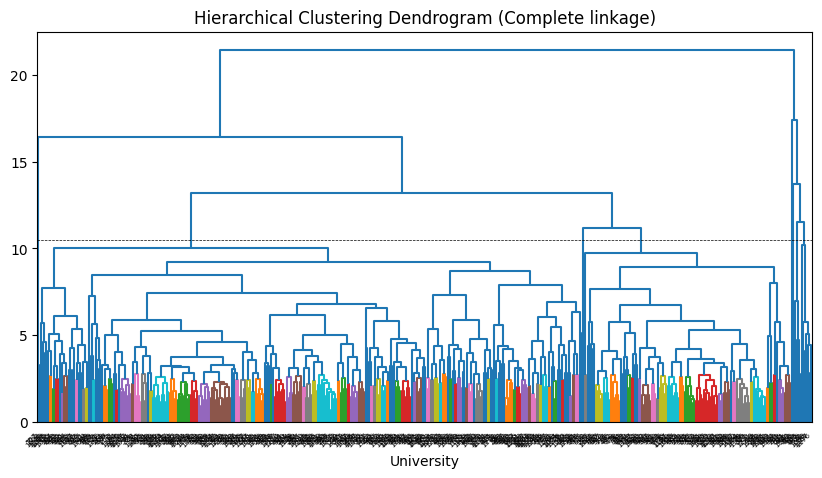

In [60]:
raw_university_df = pd.read_csv('Universities.csv')

# a: Remove all records with missing measurements
university_df = raw_university_df.dropna() # 1302 rows -> 471 rows

# Normalize
university_df_num = university_df.select_dtypes(include='number') # get numeric cols only
university_df_num = university_df_num.drop('Public (1)/ Private (2)', axis=1) # drop the discrete column
university_df_num_norm = (university_df_num - university_df_num.mean(numeric_only=True))/university_df_num.std(numeric_only=True) # normalize
university_df.update(university_df_num_norm) # merge

# b: hierarchical clustering using complete linkage and Euclidean distance
university_dist = pairwise.pairwise_distances(university_df_num_norm, 
                                     metric='euclidean')
pd.DataFrame(university_dist, columns=university_df.index, index=university_df.index).head(5)

Z = linkage(university_df_num_norm, method='complete')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('University')
dendrogram(Z, labels=university_df_num_norm.index, color_threshold=2.75)
plt.axhline(y=10.5, color='black', linewidth=0.5, linestyle='dashed')
plt.xticks(rotation=45, ha='right')
plt.show()
# reasonable number of clusters for describing the data:
# At distance of 10.5 (horizontal line in the dendrogram image) data can be reduced to 9 clusters

# Problem 15.4
An equities analyst is studying the pharmaceutical industry and would like your help in exploring and understanding the financial data collected by her firm. Her main objective is to understand the structure of the pharmaceutical industry using some basic financial measures.
Financial data gathered on 21 firms in the pharmaceutical industry are available in the file Pharmaceuticals.csv. For each firm, the following variables are recorded:
1. Market capitalization (in billions of dollars)
2. Beta
3. Price/earnings ratio
4. Return on equity
5. Return on assets
6. Asset turnover
7. Leverage
8. Estimated revenue growth
9. Net profit margin
10. Median recommendation (across major brokerages)
11. Location of firm’s headquarters
12. Stock exchange on which the firm is listed

Use cluster analysis to explore and analyze the given dataset as follows:
a.
    Use only the numerical variables (1–9) to cluster the 21 firms. Justify the various choices made in conducting the cluster analysis, such as weights for different variables, the specific clustering algorithm(s) used, the number of clusters formed, and so on.
b. 
    Interpret the clusters with respect to the categorical variables used in forming the clusters.
c. 
    Is there a pattern in the clusters with respect to the numerical variables (10–12)? (those not used in forming the clusters).
d. 
    Provide an appropriate name for each cluster using any or all of the variables in the dataset.